
<p><img style="float: centre ; margin: 5px 20px 5px 10px; width: 30%" src="https://www.gutenberg.org/files/11/11-h/images/cover.jpg"> </p>
<p>In this notebook we will scrape the novel by Lewis Carrol <em>Alice in Wonderland</em>, which is available on the website <a href="https://www.gutenberg.org/">Project Gutenberg</a>. </p>
<p>The purpose of this text processing is to learn what are the most common words in the book. </p>


## 1. Tools for text processing

In [43]:
import requests
from bs4 import BeautifulSoup

# Natural Language Toolkit
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams, FreqDist

# Counter for word counting
import re
from collections import Counter

# Visualisations

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import codecs

html = codecs.open("../input/alice-in-wonderland-project-gutenberg/11-h.htm", 'r', 'utf-8')
print('Done!')

Done!


In [45]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

In [46]:
print(text[0:2000])





The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll




The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online
at www.gutenberg.org. If you
are not located in the United States, you will have to check the laws of the
country where you are located before using this eBook.

Title: Alice’s Adventures in Wonderland
Author: Lewis Carroll
Release Date: January, 1991 [eBook #11]
[Most recently updated: October 12, 2020]
Language: English
Character set encoding: UTF-8
Produced by: Arthur DiBianca and David Widger
*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***



Alice’s Adventures in Wonderland
by Lewis Carroll
THE MILLENNIUM

### Removing non-word characters 
We want to remove everything that isn't a word, for example whitespace, punctuation. Then we want to count the words. For this, we will splitthe text into list of seperate words - tokens. We will use the Natural Language Toolkit to do this.

In [47]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
print(tokens[:8])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Alice', 's', 'Adventures']


Now we can count all words in <em> Alice in Wonderland </em>.

In [48]:
print("Total number of words in the book is:", len(tokens))

Total number of words in the book is: 30627


In [57]:
counts = Counter(tokens)
Counter(tokens).most_common(10)

[('the', 1705),
 ('and', 873),
 ('to', 804),
 ('a', 677),
 ('of', 616),
 ('I', 546),
 ('it', 543),
 ('she', 513),
 ('said', 458),
 ('in', 421)]

### The most common words.
Now we can move to counting unique word. First, lets notice that we don't want the same words, such as `it` and `It` starting with big or small letter to be counted as two different words. That is why, we change all words to start with lower case.

In [50]:
words = [word.lower() for word in tokens]

# Printing out the first 8 words / tokens 
print(words[:8])

['the', 'project', 'gutenberg', 'ebook', 'of', 'alice', 's', 'adventures']


In [51]:
counts = Counter(words)
Counter(counts).most_common(10)

[('the', 1840),
 ('and', 942),
 ('to', 811),
 ('a', 695),
 ('of', 639),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 486),
 ('said', 462)]

### Remove stop words
We may see that among the most occuring words are `the`, `a`, `of`. In English these words are called **stop words**. For purpose of this text processing they are not too interesting for us, that is why we will remove them. 
Nltk has a library of stop words.

In [52]:
stop_words = nltk.corpus.stopwords.words('english')

# We make new list of words without stop words.

words_filtered = [word for word in words if word not in stop_words]
print(words_filtered[:10])

['project', 'gutenberg', 'ebook', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'project', 'gutenberg']


In [53]:
len(words_filtered)

14145

### The most common words
Finally we can take a look at the most common words in the book.

In [54]:
Counter(words_filtered).most_common(10)

[('said', 462),
 ('alice', 404),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 99),
 ('project', 89),
 ('know', 88),
 ('like', 85),
 ('would', 83),
 ('went', 83)]

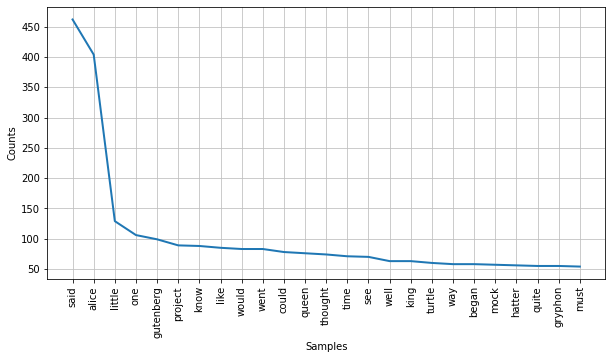

In [55]:
from matplotlib.pyplot import figure
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_filtered)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)

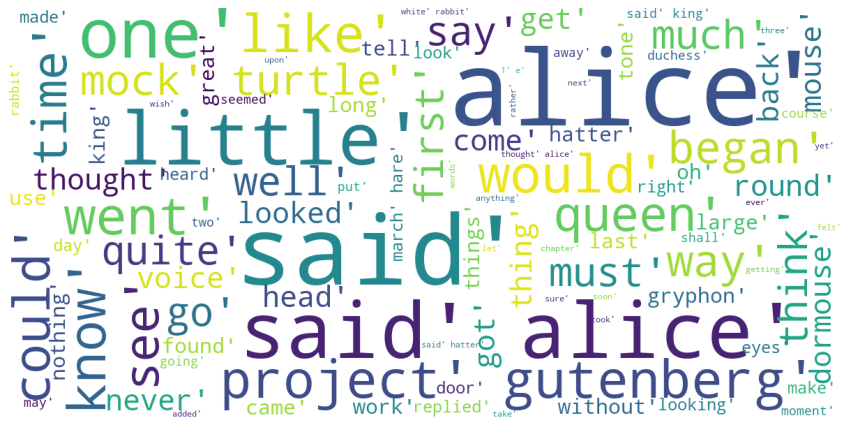

In [56]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=50, 
        scale=3,
        random_state=1 
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_filtered)